In [18]:
import gzip
import pickle
import numpy as np
from tensorflow import keras
import pandas as pd

def evaluate(path, model):
    X, y = pickle.load(gzip.open(path, 'rb'))
    y[y != 0] -= 2
    X = X / 255.
    acc = np.mean(model(X).numpy().argmax(axis=1) == y)
    return acc

## Loading data

In [19]:
path = 'flatland_train.data'
X, y = pickle.load(gzip.open(path, 'rb')) #(10000, 50, 50)
# data pre-proc
y[y != 0] -= 2 # labels from 0 to 4
X = X / 255.   # in range [0, 1]

In [20]:
X.shape

(10000, 50, 50)

In [21]:
y.shape

(10000,)

Šiame data set yra 10000 paveiksliukų, kurie yra 50x50 pikselių dydžio.

In [22]:
from collections import Counter

In [23]:
Counter(y)

Counter({2.0: 1868, 4.0: 1761, 3.0: 2137, 1.0: 2853, 0.0: 1381})

Data set sudaro šios figūros, t.y. 5 klasės:\
Apskritimų: 1381 \
Trikampių: 2853 \
Keturkampių: 1868 \
Penkiakampių: 2137 \
Šešiakampių: 1761

TODO: Split to train and test set

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Paveiksliukai iš kiekvienos klasės:

In [25]:
import matplotlib.pyplot as plt

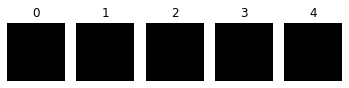

In [26]:
for i in range(5):
    idx = np.where(y_train == i)[0][0]
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(i)
    plt.axis('off')

## DNN

In [27]:
model = keras.models.Sequential()
# All data pre-processing should be in keras model
model.add(keras.layers.Flatten(input_shape=(50, 50))) # (10000, 2500)
model.add(keras.layers.Dense(20, activation='relu'))
model.add(keras.layers.Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
# if you use categorical_crossentropy, then it expects one hot encoded output. Pridedu sparse

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 2500)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                50020     
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 105       
Total params: 50,125
Trainable params: 50,125
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X,y, epochs=10)

Epoch 1/10
313/313 [==============================] - 1s 2ms/step - loss: 1.4605 - accuracy: 0.3856
Epoch 2/10
313/313 [==============================] - 1s 2ms/step - loss: 1.2983 - accuracy: 0.4733
Epoch 3/10
313/313 [==============================] - 1s 2ms/step - loss: 1.2287 - accuracy: 0.4948
Epoch 4/10
313/313 [==============================] - 1s 2ms/step - loss: 1.1849 - accuracy: 0.5102
Epoch 5/10
313/313 [==============================] - 1s 2ms/step - loss: 1.1540 - accuracy: 0.5139
Epoch 6/10
313/313 [==============================] - 1s 2ms/step - loss: 1.1295 - accuracy: 0.5332
Epoch 7/10
313/313 [==============================] - 1s 2ms/step - loss: 1.1067 - accuracy: 0.5363
Epoch 8/10
313/313 [==============================] - 1s 2ms/step - loss: 1.0864 - accuracy: 0.5483
Epoch 9/10
313/313 [==============================] - 1s 2ms/step - loss: 1.0641 - accuracy: 0.5555
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 1.0469 - accuracy: 0.5606

In [29]:
model.save('model.h5')

In [36]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(50,50)))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.Adam(learning_rate=3e-4),
             metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 2500)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               1280512   
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)              

Epoch 1/30
235/235 [==============================] - 1s 4ms/step - loss: 0.4509 - accuracy: 0.8155 - val_loss: 0.5841 - val_accuracy: 0.7768
Epoch 2/30
235/235 [==============================] - 1s 3ms/step - loss: 0.4386 - accuracy: 0.8213 - val_loss: 0.5897 - val_accuracy: 0.7708
Epoch 3/30
235/235 [==============================] - 1s 3ms/step - loss: 0.4438 - accuracy: 0.8151 - val_loss: 0.5481 - val_accuracy: 0.7908
Epoch 4/30
235/235 [==============================] - 1s 3ms/step - loss: 0.4110 - accuracy: 0.8296 - val_loss: 0.5837 - val_accuracy: 0.7876
Epoch 5/30
235/235 [==============================] - 1s 3ms/step - loss: 0.4076 - accuracy: 0.8344 - val_loss: 0.5908 - val_accuracy: 0.7960
Epoch 6/30
235/235 [==============================] - 1s 4ms/step - loss: 0.4077 - accuracy: 0.8339 - val_loss: 0.5584 - val_accuracy: 0.7908
Epoch 7/30
235/235 [==============================] - 1s 3ms/step - loss: 0.3896 - accuracy: 0.8389 - val_loss: 0.5643 - val_accuracy: 0.7996
Epoch 

<AxesSubplot:>

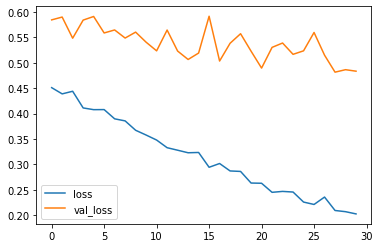

In [40]:
loss = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)
pd.DataFrame(loss.history)[['loss','val_loss']].plot()

In [41]:
model.save('model1.h5')

## Testing models

In [33]:
model = keras.models.load_model('model.h5')
evaluate('flatland_train.data', model)

0.5798

In [42]:
model = keras.models.load_model('model1.h5')
evaluate('flatland_train.data', model)

0.94